Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.

## План:

1. Загрузка данных и подготовка к анаизу
2. Отчеты: 
   - Отчет по продукту, количеству пользователей, их поведению;
   - Отчет по продажам товара;
   - Отчет по эффективности маркетинга
3. Вывод



## 1) Загрузка данных и подготовка к анализу

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
visits = pd.read_csv('/Users/kirillanosov/Downloads/visits_log (1).csv')

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:

visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
visits.columns = visits.columns.str.lower()

visits['uid'] = visits['uid'].astype('float64')

In [8]:
visits['start ts'] = pd.to_datetime(visits['start ts'], format = '%Y-%m-%d %H:%M')
visits['end ts'] = pd.to_datetime(visits['end ts'], format = '%Y-%m-%d %H:%M')

In [9]:
orders = pd.read_csv('/Users/kirillanosov/Downloads/orders_log (1).csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [13]:
orders.columns = orders.columns.str.lower()

In [14]:
orders['uid'] = orders['uid'].astype('float64')

In [15]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'], format = '%Y-%m-%d %H:%M')
orders['buy ts1'] = orders['buy ts'].astype('datetime64[M]')

In [16]:
costs = pd.read_csv('/Users/kirillanosov/Downloads/costs (1).csv')

In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [19]:
costs.head(10)


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [20]:
costs.columns = costs.columns.str.lower()

In [21]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d %H:%M')
costs['month'] = costs['dt'].astype('datetime64[M]')

In [22]:
costs

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


Переименуем колонки во всех датафреймах:

In [23]:
visits.set_axis(['device', 'end', 'source_id', 'start', 'uid'], axis = 'columns', inplace = True)
orders.set_axis(['buy_time', 'revenue', 'uid', 'buy_month'], axis = 'columns', inplace = True)
costs.set_axis(['source_id', 'date', 'costs', 'month'], axis = 'columns', inplace = True)

## 2) Отчеты

## - Отчет по продукту:

Нам надо посчитать количество пользователей в день, неделю, месяц. 

In [24]:
product = visits
product['session_year'] = product['start'].dt.year
product['session_month'] = product['start'].dt.month
product['session_week'] = product['start'].dt.week
product['session_date'] = product['start'].dt.date


In [25]:
dau_total = product.groupby('session_date').agg({'uid' : 'nunique'}).mean()

wau_total = product.groupby(['session_year','session_week' ]).agg({'uid' : 'nunique'}).mean()

mau_total = product.groupby(['session_year','session_month' ]).agg({'uid' : 'nunique'}).mean()
print(int(dau_total)) 
print(int(wau_total))
print(int(mau_total)) 

907
5716
23228


Получается, у нас **907** уникальных пользователей в день, **5716** в неделю и **23228** в месяц

In [26]:
visits_per_user = product.groupby('session_date').agg({'uid' : ['count', 'nunique']})
visits_per_user.columns = ['n_visits', 'n_users']
visits_per_user['visits_per_user'] = visits_per_user['n_visits'] / visits_per_user['n_users']
visits_per_user['visits_per_user'].mean() 

1.0821696440039723

In [27]:
product['visit_duration_sec'] = (product['end'] - product['start']).dt.seconds
product['visit_duration_sec'].mean() 
product['visit_duration_sec'].mode() 

0    60
dtype: int64

В среднем **1 сессия** в день, длительность сессии **60 секунд**

In [28]:
sticky_wau = dau_total / wau_total * 100

sticky_mau = dau_total / mau_total * 100
print(sticky_wau)
print(sticky_mau) 

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Итак,люди в среднем возарщаются к нашему приложению **16 раз в неделю** и **4 раза в месяц**. Неплохие цифры для сервиса Афиша, но можно лучше

Посчитаем процент вохвращения людей - retention rate:

In [38]:

visits_first_active = visits.groupby(['uid'])['start'].min()
visits_first_active.name = 'first_activity_time'
visit = visits.merge(visits_first_active, on = 'uid')
visit['first_activity_month'] = visit['first_activity_time'].astype('datetime64[M]')
visit['activity_month'] = visit['start'].astype('datetime64[M]')
visit['cohort_lifetime'] = (visit['activity_month'] - visit['first_activity_month'])/ np.timedelta64(1,'M')
visit['cohort_lifetime'] = round(visit['cohort_lifetime'].astype('float'))
visit['cohort_lifetime'] = visit['cohort_lifetime'].astype('int')
visit.head()

,device,end,source_id,start,uid,session_year,session_month,session_week,session_date,visit_duration_sec,duration,first_activity_time,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,1.687926e+19,2017,12,51,2017-12-20,1080,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,1.040604e+17,2018,2,8,2018-02-19,1680,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7.459036e+18,2017,7,26,2017-07-01,0,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,1.617468e+19,2018,5,20,2018-05-20,1440,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,1.617468e+19,2018,3,10,2018-03-09,1680,1680,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [40]:
cohort_l = visit.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Найдем исходное число пользователей:

In [41]:
initial_user = cohort_l[cohort_l['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_user

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [42]:
initial_user = initial_user.rename(columns={'uid':'cohort_users'})

In [43]:
cohort_l = cohort_l.merge(initial_user,on='first_activity_month')
cohort_l['retention'] = cohort_l['uid']/cohort_l['cohort_users']

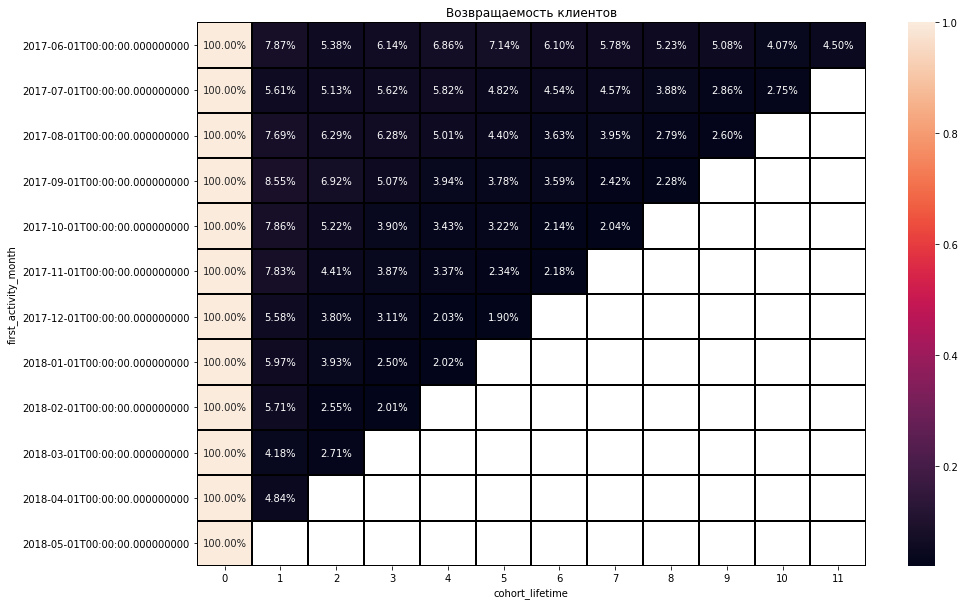

In [45]:
retention = cohort_l.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
plt.figure(figsize = (15,10))
plt.title('Возвращаемость клиентов')
sns.heatmap(retention, annot = True, fmt = '.2%', linewidths = 1, linecolor = 'black')

In [46]:
visits = visits.drop(['session_year', 'session_month', 'session_week', 'session_date'], axis = 1 )

**Вывод:**
Пользователей в целом не очень много - 23228 уникальных в месяц. Длительность сессии 60 секунд, но для сервиса с расписанием мероприятий вполне понятная цифра - все таки люди очень часто заходят, чтобы найти что-то конкретное, поэтому и не задерживаются. 
Самый высокий процент возращаемлсти клиентов (retention rate) у первого месяца, а также с 3-5, в некоторых когортах это второй месяц


# - Продажи:

## - Посчитаем, когда люди начинают покупать:

In [47]:
first_orders = orders.groupby('uid').agg({'buy_month' : 'min'}).reset_index()
first_orders

,uid,buy_month
0,3.135781e+14,2018-01-01
1,1.575282e+15,2017-06-01
2,2.429015e+15,2017-10-01
3,2.464366e+15,2018-01-01
4,2.551853e+15,2017-11-01
...,...,...
36518,1.844515e+19,2017-11-01
36519,1.844541e+19,2017-09-01
36520,1.844560e+19,2018-03-01
36521,1.844616e+19,2018-02-01


In [48]:
first_orders.columns = ['uid', 'first_order_month']

first_orders

,uid,first_order_month
0,3.135781e+14,2018-01-01
1,1.575282e+15,2017-06-01
2,2.429015e+15,2017-10-01
3,2.464366e+15,2018-01-01
4,2.551853e+15,2017-11-01
...,...,...
36518,1.844515e+19,2017-11-01
36519,1.844541e+19,2017-09-01
36520,1.844560e+19,2018-03-01
36521,1.844616e+19,2018-02-01


In [49]:
orders_first_month = pd.merge(orders, first_orders, on = 'uid')
orders_first_month


,buy_time,revenue,uid,buy_month,first_order_month
0,2017-06-01 00:10:00,17.00,1.032930e+19,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,1.162726e+19,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,1.790368e+19,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,1.610924e+19,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,1.420061e+19,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,1.229663e+19,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,1.136964e+19,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1.786462e+18,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3.993698e+18,2018-05-01,2018-05-01


In [50]:
visits['day'] = visits['start'].dt.date
orders['day'] = orders['buy_time'].dt.date
period = visits.merge(orders, on = ['uid', 'day'], how = 'left')

In [51]:
period = period.query('end >= buy_time >= start')

In [52]:
period['start_b'] = period['buy_time'] - period['start']
period['start_b'] = period['start_b'].dt.total_seconds()
period

,device,end,source_id,start,uid,visit_duration_sec,duration,day,buy_time,revenue,buy_month,start_b
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,1.818836e+19,3960,3960,2018-02-12,2018-02-12 19:48:00,0.73,2018-02-01,1440.0
37,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,1.585796e+19,720,720,2018-03-12,2018-03-12 23:17:00,1.83,2018-03-01,240.0
61,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,1.816951e+19,1200,1200,2017-10-03,2017-10-03 10:13:00,2.75,2017-10-01,180.0
71,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9.344114e+18,480,480,2018-02-25,2018-02-25 23:36:00,0.98,2018-02-01,60.0
74,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3.577449e+18,120,120,2018-04-19,2018-04-19 17:47:00,5.13,2018-04-01,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
367086,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,1.836329e+19,19,19,2017-07-29,2017-07-29 19:07:00,1.34,2017-07-01,0.0
367088,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,1.837083e+19,19,19,2018-01-25,2018-01-25 17:38:00,2.93,2018-01-01,0.0
367090,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,1.838730e+19,19,19,2018-03-03,2018-03-03 10:12:00,0.61,2018-03-01,0.0
367091,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,1.838862e+19,19,19,2017-11-02,2017-11-02 10:12:00,2.69,2017-11-01,0.0


In [53]:
period['min_to_buy'] = period['start_b'] / 60
period

,device,end,source_id,start,uid,visit_duration_sec,duration,day,buy_time,revenue,buy_month,start_b,min_to_buy
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,1.818836e+19,3960,3960,2018-02-12,2018-02-12 19:48:00,0.73,2018-02-01,1440.0,24.0
37,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,1.585796e+19,720,720,2018-03-12,2018-03-12 23:17:00,1.83,2018-03-01,240.0,4.0
61,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,1.816951e+19,1200,1200,2017-10-03,2017-10-03 10:13:00,2.75,2017-10-01,180.0,3.0
71,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9.344114e+18,480,480,2018-02-25,2018-02-25 23:36:00,0.98,2018-02-01,60.0,1.0
74,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3.577449e+18,120,120,2018-04-19,2018-04-19 17:47:00,5.13,2018-04-01,60.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367086,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,1.836329e+19,19,19,2017-07-29,2017-07-29 19:07:00,1.34,2017-07-01,0.0,0.0
367088,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,1.837083e+19,19,19,2018-01-25,2018-01-25 17:38:00,2.93,2018-01-01,0.0,0.0
367090,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,1.838730e+19,19,19,2018-03-03,2018-03-03 10:12:00,0.61,2018-03-01,0.0,0.0
367091,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,1.838862e+19,19,19,2017-11-02,2017-11-02 10:12:00,2.69,2017-11-01,0.0,0.0


In [54]:
period['min_to_buy'].describe()

count    35742.000000
mean         9.765598
std         14.352490
min          0.000000
25%          2.000000
50%          5.000000
75%         12.000000
max        326.000000
Name: min_to_buy, dtype: float64

Люди в среднем начинают покупать через **10** минут

## - Посмотрим, сколько раз люди покупают за период:

In [55]:
first_period = period.groupby('uid').agg({'buy_month' : 'min'}).reset_index()

In [56]:
first_period.columns = ['uid', 'first_order_month']

In [57]:
periods = pd.merge(period, first_period, on = 'uid')
periods


,device,end,source_id,start,uid,visit_duration_sec,duration,day,buy_time,revenue,buy_month,start_b,min_to_buy,first_order_month
0,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,1.818836e+19,3960,3960,2018-02-12,2018-02-12 19:48:00,0.73,2018-02-01,1440.0,24.0,2018-02-01
1,touch,2018-02-13 20:13:00,2,2018-02-13 19:45:00,1.818836e+19,1680,1680,2018-02-13,2018-02-13 19:48:00,0.06,2018-02-01,180.0,3.0,2018-02-01
2,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,1.585796e+19,720,720,2018-03-12,2018-03-12 23:17:00,1.83,2018-03-01,240.0,4.0,2018-03-01
3,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,1.816951e+19,1200,1200,2017-10-03,2017-10-03 10:13:00,2.75,2017-10-01,180.0,3.0,2017-09-01
4,desktop,2017-09-29 06:05:00,1,2017-09-29 05:51:00,1.816951e+19,840,840,2017-09-29,2017-09-29 05:54:00,17.11,2017-09-01,180.0,3.0,2017-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35737,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,1.826837e+19,19,19,2017-12-11,2017-12-11 17:54:00,1.67,2017-12-01,0.0,0.0,2017-12-01
35738,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,1.830423e+19,19,19,2017-08-30,2017-08-30 11:53:00,2.32,2017-08-01,0.0,0.0,2017-08-01
35739,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,1.838730e+19,19,19,2018-03-03,2018-03-03 10:12:00,0.61,2018-03-01,0.0,0.0,2018-03-01
35740,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,1.838862e+19,19,19,2017-11-02,2017-11-02 10:12:00,2.69,2017-11-01,0.0,0.0,2017-11-01


In [58]:
buys = periods.groupby(['first_order_month', 'buy_month']).agg({'uid' : 'nunique', 'buy_time' : 'count'}).reset_index()
buys['per_u'] = buys['buy_time'] / buys['uid']

buys


,first_order_month,buy_month,uid,buy_time,per_u
0,2017-06-01,2017-06-01,1807,1980,1.095739
1,2017-06-01,2017-07-01,30,73,2.433333
2,2017-06-01,2017-08-01,24,73,3.041667
3,2017-06-01,2017-09-01,29,98,3.379310
4,2017-06-01,2017-10-01,45,132,2.933333
...,...,...,...,...,...
73,2018-03-01,2018-04-01,40,72,1.800000
74,2018-03-01,2018-05-01,25,76,3.040000
75,2018-04-01,2018-04-01,1771,1876,1.059289
76,2018-04-01,2018-05-01,35,85,2.428571


In [59]:
buys['age'] = buys['buy_month'] - buys['first_order_month']
buys['age'] = buys['age'] / np.timedelta64(1, 'M')
buys['age'] = buys['age'].round().astype('int')
buys


,first_order_month,buy_month,uid,buy_time,per_u,age
0,2017-06-01,2017-06-01,1807,1980,1.095739,0
1,2017-06-01,2017-07-01,30,73,2.433333,1
2,2017-06-01,2017-08-01,24,73,3.041667,2
3,2017-06-01,2017-09-01,29,98,3.379310,3
4,2017-06-01,2017-10-01,45,132,2.933333,4
...,...,...,...,...,...,...
73,2018-03-01,2018-04-01,40,72,1.800000,1
74,2018-03-01,2018-05-01,25,76,3.040000,2
75,2018-04-01,2018-04-01,1771,1876,1.059289,0
76,2018-04-01,2018-05-01,35,85,2.428571,1


In [60]:
buy = buys.pivot_table(index = 'first_order_month', columns = 'age', values = 'per_u')
buy

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.095739,2.433333,3.041667,3.379310,2.933333,2.476190,3.527778,2.857143,2.638889,2.666667,1.692308,1.454545
2017-07-01,1.079728,1.500000,2.391304,1.629630,1.153846,2.250000,1.666667,1.153846,1.350000,1.000000,2.000000,NaN
2017-08-01,1.072552,1.409091,1.409091,1.200000,1.166667,1.500000,1.000000,1.250000,1.500000,1.176471,NaN,NaN
2017-09-01,1.077793,1.514706,1.625000,2.228571,1.454545,1.961538,1.500000,1.200000,1.391304,NaN,NaN,NaN
2017-10-01,1.085596,1.360825,1.169231,1.179487,1.176471,1.468750,1.320000,1.307692,NaN,NaN,NaN,NaN
2017-11-01,1.095649,1.414141,1.220000,1.255319,1.096774,1.157895,2.064516,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.089033,1.897436,2.269231,1.816327,1.678571,1.459459,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.067279,1.946429,2.066667,1.545455,2.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.068236,1.500000,1.500000,1.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


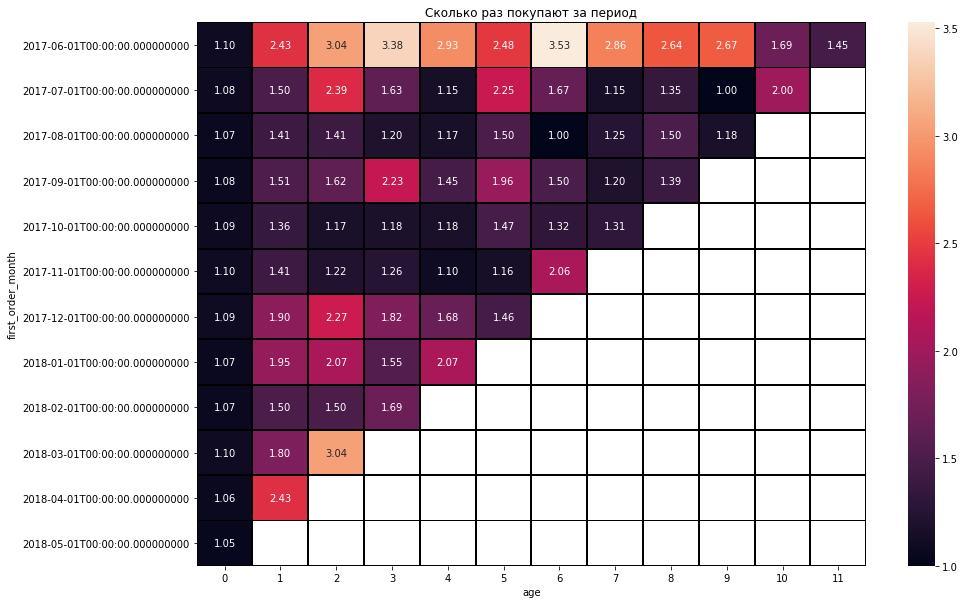

In [61]:
plt.figure(figsize = (15,10))
plt.title('Сколько раз покупают за период')
sns.heatmap(buy, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'black')

Во все периоды покупают примерно одинаково

## Рассчитаем средний чек:

Сначала посмотрим, сколько в среднем прибыли получаем от одного пользователя:

In [62]:
cohort_grp = orders_first_month.groupby(['first_order_month', 'buy_month']).agg({'revenue' : 'sum', 'uid' : 'nunique'})
cohort_grp = cohort_grp.reset_index()
cohort_grp['age'] = cohort_grp['buy_month'] - cohort_grp['first_order_month']
cohort_grp['age'] = cohort_grp['age'] / np.timedelta64(1, 'M')
cohort_grp['age'] = cohort_grp['age'].round().astype('int')

In [63]:
cohort_grp['revenue_per_user'] = cohort_grp['revenue'] / cohort_grp['uid']
cohort_grp = cohort_grp.reset_index()
cohort_grp

,index,first_order_month,buy_month,revenue,uid,age,revenue_per_user
0,0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,1,2017-06-01,2017-07-01,981.82,61,1,16.095410
2,2,2017-06-01,2017-08-01,885.34,50,2,17.706800
3,3,2017-06-01,2017-09-01,1931.30,54,3,35.764815
4,4,2017-06-01,2017-10-01,2068.58,88,4,23.506591
...,...,...,...,...,...,...,...
74,74,2018-03-01,2018-05-01,1114.87,58,2,19.221897
75,75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,76,2018-04-01,2018-05-01,1209.92,69,1,17.535072
77,77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [64]:
grp = cohort_grp.pivot_table(index = 'first_order_month', columns = 'age', values = 'revenue_per_user')
grp

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


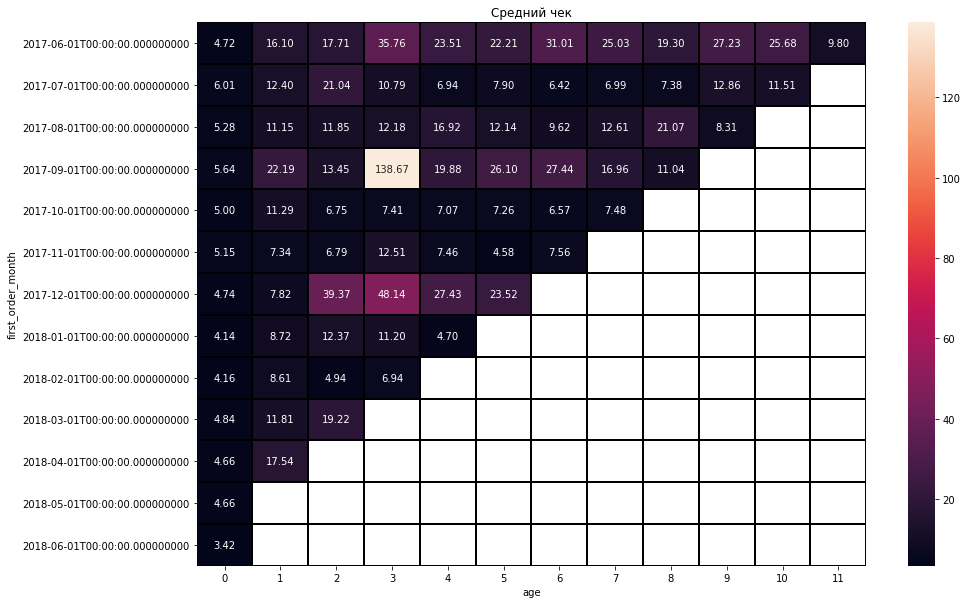

In [65]:
plt.figure(figsize = (15,10))
plt.title('Средний чек')
sns.heatmap(grp, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'black')

Самые успешные месяцы с точки зрения средней прибыли это **сентябрь и декабрь 2017**

Теперь посмотрим средний чек:

In [66]:
check = periods.groupby(['first_order_month', 'buy_month']).agg({'uid' : 'nunique', 'buy_time' : 'count', 'revenue' : 'sum'}).reset_index()
check['age'] = check['buy_month'] - check['first_order_month']
check['age'] = check['age'] / np.timedelta64(1, 'M')
check['age'] = check['age'].round().astype('int')
check['m_check'] = check['revenue'] / check['buy_time']
check['m_check'].describe() 

count    78.000000
mean      7.470596
std       7.294939
min       2.666400
25%       4.375872
50%       5.286814
75%       8.081430
max      57.498205
Name: m_check, dtype: float64

Средний чек за весь период - **7.470596**. Не очень много денег нам приносит сервис

## Сколько денег приносят пользователи (LTV):

In [67]:
chort_sz = first_orders.groupby('first_order_month').agg({'uid' : 'nunique'}).reset_index()
chort_sz.columns = ['first_order_month', 'n_buyers']
chort_sz

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Больше всего покупателей с **ноября 2017 по март 2018** включительно, это самый успешный промежуток времени

Теперь определим выручку и объединим таблицы с количесвтом покупателей и прибылью:

In [68]:
orders_first_month = pd.merge(orders, first_orders, on = 'uid')


cohorts = orders_first_month.groupby(['first_order_month', 'buy_month']).agg({'revenue' : 'sum'}).reset_index()
cohorts

,first_order_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [69]:
report = pd.merge(chort_sz, cohorts, on = 'first_order_month')
report

,first_order_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


Найдем срок жизни клиентов: 

In [70]:
report['age'] = (report['buy_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

Посмотрим, сколько приносят денег пользователи:

In [71]:
report['ltv'] = report['revenue'] / report['n_buyers']
report.head(20)

,first_order_month,n_buyers,buy_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
5,2017-06-01,2023,2017-11-01,1487.92,5,0.735502
6,2017-06-01,2023,2017-12-01,1922.74,6,0.950440
7,2017-06-01,2023,2018-01-01,1176.56,7,0.581592
8,2017-06-01,2023,2018-02-01,1119.15,8,0.553213
9,2017-06-01,2023,2018-03-01,1225.51,9,0.605788


In [72]:
result = report.pivot_table(
         index = 'first_order_month',
         columns = 'age',
         values = 'ltv',
         aggfunc = 'mean').round()
m6_cum_ltv = result.cumsum(axis = 1).mean(axis = 0)[5]


In [73]:
m6_cum_ltv


7.285714285714286

Как мы видим, за первые 6 месяцев средняя ценность клиента 7.285714285714286. Значит маркетологам надо тратить меньше этой суммы на привлечение клиента

*Общий вывод по разделу*:
Мы выяснили, что в среднем проходит около 10 минут, прежде чем пользователь делает покупку. Покупают пользователи более 2 раз в месяц. Это хороший показатель, учитывая специфику сервиса.
С точки зрения прибыли самые успешные месяцы **сентябрь и декабрь 2017**. Это легко объясняется сезонностью. Ценнсоть клиента 7.285714285714286. Значит маркетологам надо тратить меньше этой суммы на привлечение клиента

# Маркетинг

In [74]:
costs.head()

,source_id,date,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [75]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Количество источников рекламы одинаковое

## Посмотрим сколько **всего денег** было потрачено на маркетинг за все время:

In [76]:
costs['costs'].sum()

329131.62

## Теперь посмотрим сколько денег потратили на **каждый источник** рекламы:


In [77]:
cost_per_source = costs.groupby('source_id').agg({'costs' : 'sum'})
cost_per_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Как траты распределились по каналам:
1. 20833.27
2. 42806.04
3. 141321.63
4. 61073.60
5. 51757.10
9. 5517.49
10. 5822.49


Самый популярный канал - **3**. **Топ-3**: 3, 4, 5.

## Посмотрим, сколько денег тратили каждый месяц:

In [78]:
cost_per_month = costs.groupby('month').agg({'costs' : 'sum'})
cost_per_month

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Больше всего денег вливали с **октября 2017 по март 2018**, т.е. каждый месяц выделялось более 30 тысяч на продвижение в различных каналах. Это, кстати, соттносится с прибылью по месяцам - там тоже самые большие прибыли в этих датах

## Посчитаем сколько стоило привлечение клиентов:


In [79]:
final = pd.merge(report, cost_per_month,  left_on='first_order_month', right_on='month')
final

,first_order_month,n_buyers,buy_month,revenue,age,ltv,costs
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00
...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,30415.27
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38


In [80]:
final['cac'] = final['costs'] / final['n_buyers']
final['romi'] = final['ltv'] / final['cac']
final

,first_order_month,n_buyers,buy_month,revenue,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38,9.793225,0.054282


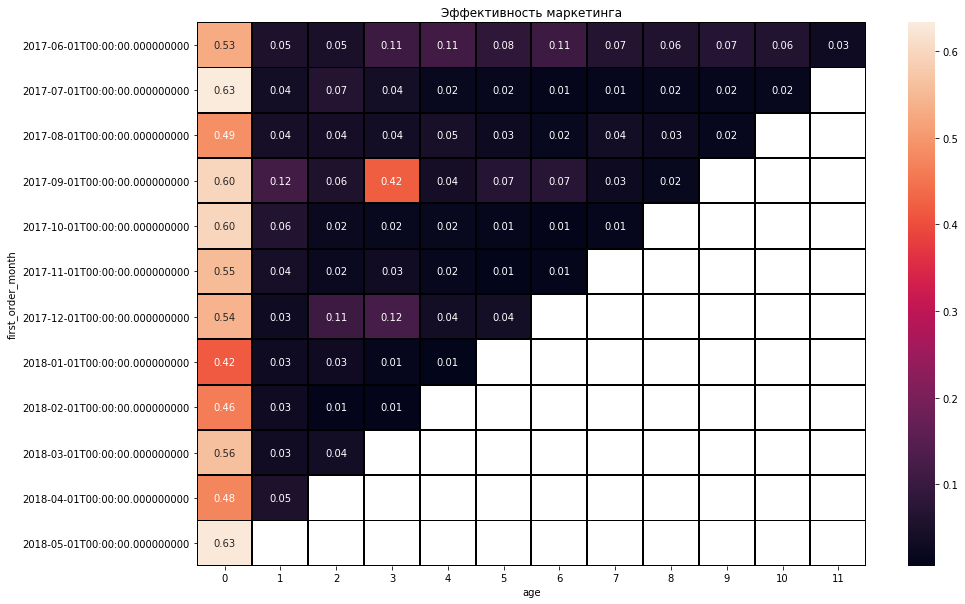

In [81]:
output1 = final.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

output1.cumsum(axis=1).round(2)
plt.figure(figsize = (15,10))
plt.title('Эффективность маркетинга')
sns.heatmap(output1, annot = True, fmt = '.2f', linewidths = 1, linecolor = 'black');

In [82]:
output1.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В целом, можно сказать, что маркетинг работает не очень эффективно. Необходимо пересмотреть маркетинговую политику

Теперь посмотрим успешность вложений по когортам:

In [83]:
output2 = final.pivot_table(index = 'first_order_month', columns = 'age', values = 'romi', aggfunc = 'mean')
romi_6 = output2.cumsum(axis = 1).mean(axis = 0)[5]
romi_6

0.8598760895593317

Когорты, прожившие 6 месяцев не показывают высокой эффективности маркетинговых вложений - **0.8598760895593317**. То есть вложения не окупаются, с этим надо что-то делать

## Метрики по девайсам:

In [84]:
period['session_date'] = period['start'].dt.date
period

,device,end,source_id,start,uid,visit_duration_sec,duration,day,buy_time,revenue,buy_month,start_b,min_to_buy,session_date
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,1.818836e+19,3960,3960,2018-02-12,2018-02-12 19:48:00,0.73,2018-02-01,1440.0,24.0,2018-02-12
37,desktop,2018-03-12 23:25:00,3,2018-03-12 23:13:00,1.585796e+19,720,720,2018-03-12,2018-03-12 23:17:00,1.83,2018-03-01,240.0,4.0,2018-03-12
61,desktop,2017-10-03 10:30:00,1,2017-10-03 10:10:00,1.816951e+19,1200,1200,2017-10-03,2017-10-03 10:13:00,2.75,2017-10-01,180.0,3.0,2017-10-03
71,desktop,2018-02-25 23:43:00,5,2018-02-25 23:35:00,9.344114e+18,480,480,2018-02-25,2018-02-25 23:36:00,0.98,2018-02-01,60.0,1.0,2018-02-25
74,desktop,2018-04-19 17:48:00,1,2018-04-19 17:46:00,3.577449e+18,120,120,2018-04-19,2018-04-19 17:47:00,5.13,2018-04-01,60.0,1.0,2018-04-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367086,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,1.836329e+19,19,19,2017-07-29,2017-07-29 19:07:00,1.34,2017-07-01,0.0,0.0,2017-07-29
367088,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,1.837083e+19,19,19,2018-01-25,2018-01-25 17:38:00,2.93,2018-01-01,0.0,0.0,2018-01-25
367090,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,1.838730e+19,19,19,2018-03-03,2018-03-03 10:12:00,0.61,2018-03-01,0.0,0.0,2018-03-03
367091,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,1.838862e+19,19,19,2017-11-02,2017-11-02 10:12:00,2.69,2017-11-01,0.0,0.0,2017-11-02


In [85]:
source = period.groupby(['device', 'source_id', 'uid', 'session_date']).agg({'revenue': 'sum'}).reset_index()
source_r = source.groupby(['device', 'source_id', 'session_date']).agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()

In [86]:
source_r

,device,source_id,session_date,uid,revenue
0,desktop,1,2017-06-01,15,149.46
1,desktop,1,2017-06-02,9,51.46
2,desktop,1,2017-06-03,7,18.05
3,desktop,1,2017-06-04,3,8.21
4,desktop,1,2017-06-05,19,52.55
...,...,...,...,...,...
4198,touch,10,2018-05-26,1,0.98
4199,touch,10,2018-05-28,1,3.36
4200,touch,10,2018-05-29,1,2.26
4201,touch,10,2018-05-30,2,3.91


In [87]:
costs['session_date'] = costs['date'].dt.date
costs_source = costs.groupby(['source_id', 'session_date']).agg({'costs': 'sum'}).reset_index()

In [88]:
count_source = source_r.merge(costs_source, on = ['source_id', 'session_date'], how = 'left')

In [89]:
count_source['visits_cost'] = count_source['costs'] / count_source['uid']


In [90]:
count_cost = count_source.groupby(['device', 'source_id']).agg({'visits_cost': 'mean'}).reset_index()

In [91]:
desktop = count_cost[count_cost['device'] == 'desktop']
mobile = count_cost[count_cost['device'] == 'touch']

In [92]:
print(desktop)
print(mobile)


    device  source_id  visits_cost
0  desktop          1     6.236556
1  desktop          2    14.780679
2  desktop          3    25.403709
3  desktop          4    11.292599
4  desktop          5     9.460726
5  desktop          7          NaN
6  desktop          9     9.209204
7  desktop         10     8.530515
   device  source_id  visits_cost
8   touch          1    27.265858
9   touch          2    59.190658
10  touch          3   165.588806
11  touch          4    51.344471
12  touch          5    72.323394
13  touch          9    15.595857
14  touch         10    14.261877


Итак, мы выяснили, что вливания в рекламу приносят прибыль, но иаркетинговая стратегия далека от идеала. Источник 3, в который вливают больше всего денег, не окупается совсем.

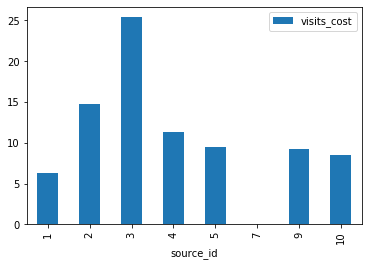

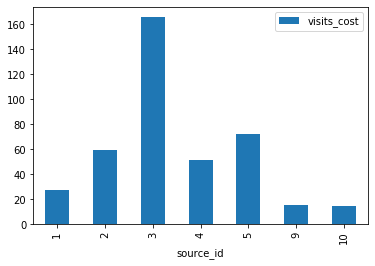

In [93]:
desktop.plot(y='visits_cost', x='source_id', kind='bar')
mobile.plot(y='visits_cost', x='source_id', kind='bar')

И для мобильный девайсов и для десктопа самый дорогой истониик клиентов - **3**. У десктопа еще выделяется по стоимости **2**, а у мобильных устройств **5**

In [94]:
count_source

,device,source_id,session_date,uid,revenue,costs,visits_cost
0,desktop,1,2017-06-01,15,149.46,75.20,5.013333
1,desktop,1,2017-06-02,9,51.46,62.25,6.916667
2,desktop,1,2017-06-03,7,18.05,36.53,5.218571
3,desktop,1,2017-06-04,3,8.21,55.00,18.333333
4,desktop,1,2017-06-05,19,52.55,57.08,3.004211
...,...,...,...,...,...,...,...
4198,touch,10,2018-05-26,1,0.98,7.89,7.890000
4199,touch,10,2018-05-28,1,3.36,21.26,21.260000
4200,touch,10,2018-05-29,1,2.26,11.32,11.320000
4201,touch,10,2018-05-30,2,3.91,33.15,16.575000


In [95]:
count_source['revenue_user'] = count_source['revenue'] / count_source['uid']
count_source['roi'] = count_source['revenue_user'] / count_source['visits_cost']
roi_s = count_source.groupby(['device', 'source_id']).agg({'roi' : 'mean'}).reset_index()


Приведем roi к процентному виду

In [96]:
roi_s['roi'] = (roi_s['roi'] * 100).round(2)
roi_s

,device,source_id,roi
0,desktop,1,120.80
1,desktop,2,68.26
2,desktop,3,21.74
3,desktop,4,210.90
4,desktop,5,61.23
5,desktop,7,NaN
6,desktop,9,61.18
7,desktop,10,62.86
8,touch,1,27.12
9,touch,2,11.54


In [97]:
desktop_roi = roi_s[roi_s['device'] == 'desktop']
mobile_roi = roi_s[roi_s['device'] == 'touch']

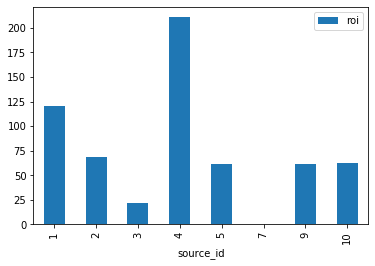

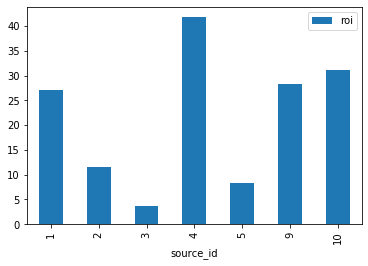

In [82]:
desktop_roi.plot(y='roi', x='source_id', kind='bar')
mobile_roi.plot(y='roi', x='source_id', kind='bar')

Интересная картина: **3** источник самый затратный, но и приносит меньше всего денег. 

*Общий вывод по маркетингу*: 
Инвестии в пользователей десктоп окпаются лучше, чем в пользоватлей мобильных устройств, но возможно дело в том, что в принципе пользователей с ПК больше. Нужно построить воронку, чтобы убедиться, что в мобильной версии нет никакиз проблем.

В целом маркетинговая стратегия успешна, но необхдимо обратить внимание на источник **3** - в него вливают очень много денег, а отдача не очень серьезная

## 3) Вывод

Самый главный вывод: необходимо пересматривать маркетинговую стратегию. Да, мы видели, что вливания денег в рекламу в период октября 2017 по март 2018 приводят к увеличению прибыли. Но анализ каналов рекламы показал, что средства расходуются не совсем правильно. Лучше будет пересмотреть распределение средств по каналам и, например, на канал **3** тратить меньше средств. Надо помнить, что на привлечение одного клиента желательно тратить меньше **7.285714285714286**.

Возможно увеличить и посещаемость сервиса, возможно с помощью напоминаний о каких-либо мероприятиях, концертах, выставках.

Также надо обратить внимание на **мобильную версию сервиса**. Получается, что больше пользователей с десктопа, но смартфоны распространены гораздо больше ввиду своей доступности. Нужно работать в этом направлении и посмотреть воронку продаж с мобильных устройств, чтобы понять, где есть проблемы. Потенциально **мобильная версия** может приносить больше прибыли и охватытвать большую аудиторию